In [13]:
import pandas as pd
loc39= pd.read_csv('39-17.01.29-02.04.csv')
print(loc39)

     Unnamed: 0   Unnamed: 1                      Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                             NaN        NaN   
1           NaN     SITE NO:  39 - Bruntsfield Place S/Bound        NaN   
2           NaN        Date:                        29/01/17        NaN   
3           NaN   Direction:                                        NaN   
4           NaN          NaN                             NaN        NaN   
5           NaN         Hour                             P/C    P/C Kph   
6           NaN  00.00-00.59                               2         12   
7           NaN  01.00-01.59                               1         16   
8           NaN  02.00-02.59                               2         14   
9           NaN  03.00-03.59                               2         14   
10          NaN  04.00-04.59                               0          0   
11          NaN  05.00-05.59                               0          0   
12          NaN  06.00-06

In [14]:
loc39 = loc39.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Bruntsfield Place - DAILY FLOW BY HOUR')
loc39.drop(loc39.index[[0,1,2,3,4,5]], inplace=True)
loc39.drop(loc39.columns[[0,5]], axis=1, inplace=True)
loc39.index = loc39.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc39.rename(columns=newcols, inplace=True)
loc39

Bruntsfield Place - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,2,12,19
1,01.00-01.59,1,16,19
2,02.00-02.59,2,14,9
3,03.00-03.59,2,14,17
4,04.00-04.59,0,0,5
5,05.00-05.59,0,0,5
6,06.00-06.59,0,0,3
7,07.00-07.59,2,20,7
8,08.00-08.59,0,0,27
9,09.00-09.59,7,19,60


In [15]:
loc39['Hourstarts'] = loc39.Hour.str.split('-').str.get(0)
loc39['Hourends'] = loc39.Hour.str.split('-').str.get(1)
loc39.drop(loc39.columns[0], axis=1, inplace=True)

In [17]:
loc39.to_csv('Loc39.csv')
loc39 = loc39.dropna(how='all')
loc39 = loc39[loc39.Hourstarts != "Direction:"]
loc39 = loc39[loc39.Hourstarts != "Total"]
loc39 = loc39[loc39.Hourstarts != "Hour"]
loc39 = loc39[loc39.Hourstarts != "Date:"]

In [18]:
pd.options.mode.chained_assignment = None

In [19]:
loc39[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc39[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [20]:
loc39day1 = loc39.iloc[0:24]
loc39day2 = loc39.iloc[24:48]
loc39day3 = loc39.iloc[48:72]
loc39day4 = loc39.iloc[72:96]
loc39day5 = loc39.iloc[96:120]
loc39day6 = loc39.iloc[120:144]
loc39day7 = loc39.iloc[144:168]
#my data is divided into 7 clean sets

In [21]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

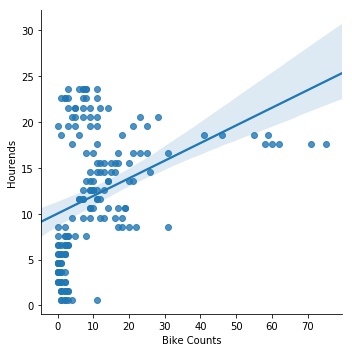

In [22]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39)

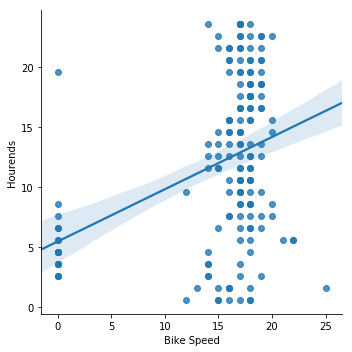

In [23]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39)

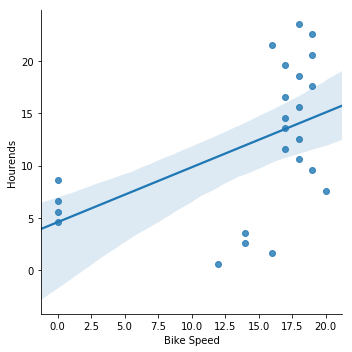

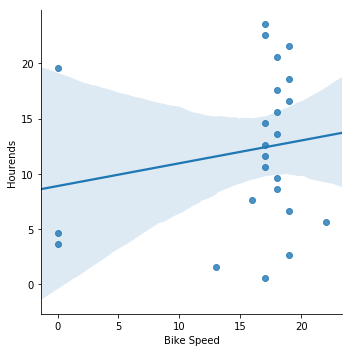

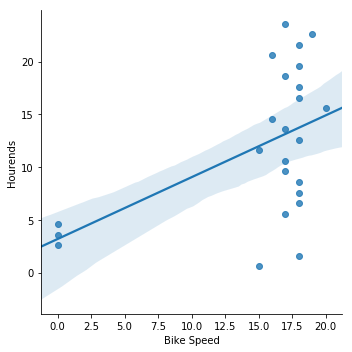

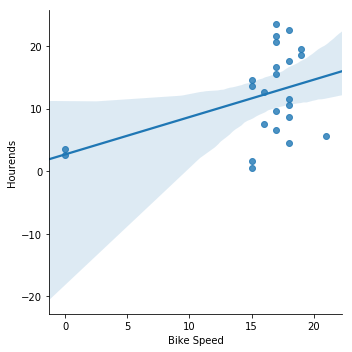

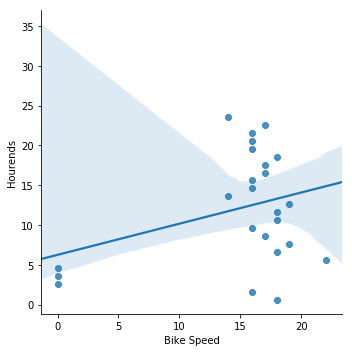

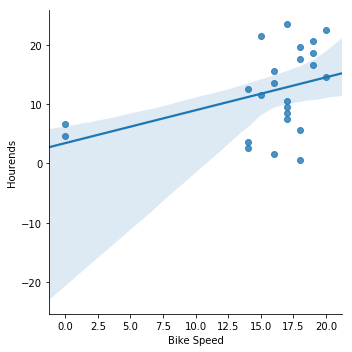

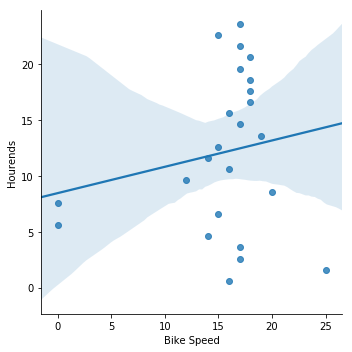

In [24]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc39day7)

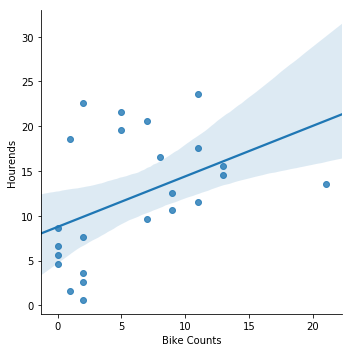

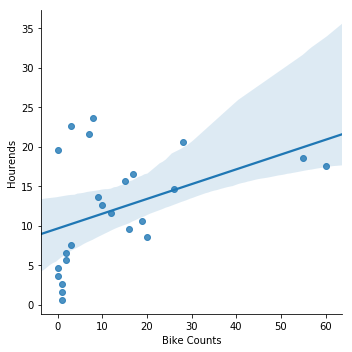

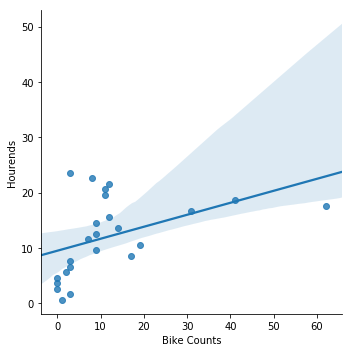

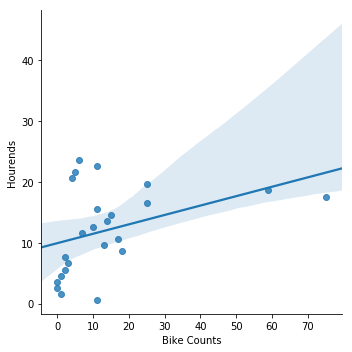

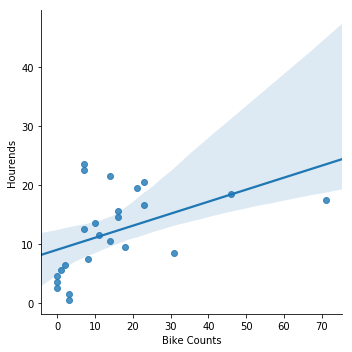

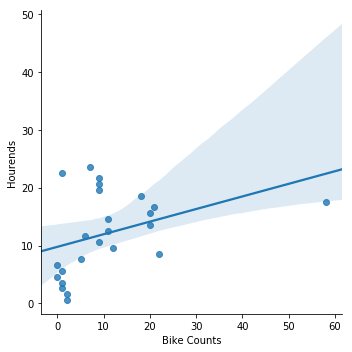

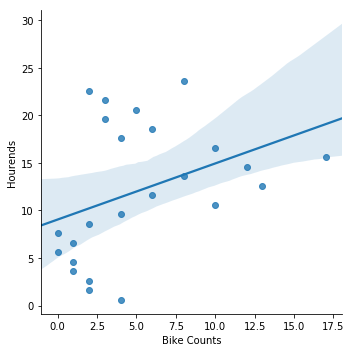

In [25]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc39day7)